            SETTLEMENT_DATE  SETTLEMENT_PERIOD  EMBEDDED_WIND_FORECAST  \
0 2025-01-01 00:00:00+00:00                  1                    5452   
1 2025-01-01 00:00:00+00:00                  2                    5358   
2 2025-01-01 00:00:00+00:00                  3                    5358   
3 2025-01-01 00:00:00+00:00                  4                    5158   
4 2025-01-01 00:00:00+00:00                  5                    5158   

   EMBEDDED_WIND_CAPACITY  EMBEDDED_SOLAR_FORECAST  EMBEDDED_SOLAR_CAPACITY  \
0                    6606                        0                    17196   
1                    6606                        0                    17196   
2                    6606                        0                    17196   
3                    6606                        0                    17196   
4                    6606                        0                    17196   

          Forecast_Datetime  
0 2025-01-01 00:12:00+00:00  
1 2025-01-01 00:12:0

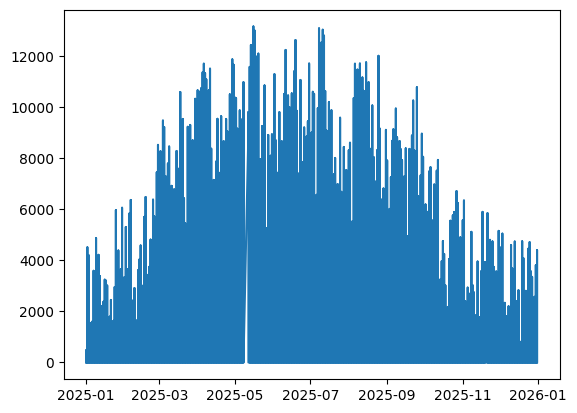

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def read_neso_data(csv_file):
    df = pd.read_csv(csv_file)

    df['SETTLEMENT_DATE'] = pd.to_datetime(df['SETTLEMENT_DATE'])
    df['Forecast_Datetime'] = pd.to_datetime(df['Forecast_Datetime'])    

    df = df.sort_values(by='SETTLEMENT_DATE', ascending=True, kind='stable').drop(columns=['DATE_GMT', 'TIME_GMT','source_file'])

    same_day_mask = (
    df["SETTLEMENT_DATE"].dt.normalize() ==
    df["Forecast_Datetime"].dt.normalize()
    )

    filtered_df = df[same_day_mask]

    filtered_df = filtered_df.drop_duplicates(
        subset=["SETTLEMENT_DATE", "SETTLEMENT_PERIOD"],
        keep="first"
    )

    print(filtered_df.head())
    print(filtered_df.shape)

    plt.plot(filtered_df['SETTLEMENT_DATE'], filtered_df['EMBEDDED_WIND_FORECAST'])
    plt.show()
    
    return 

read_neso_data('NESO2025.csv')